<h1 align='center'> Data Preparation </h1>

In [1]:
import sys, os, time
import numpy as np
import pandas as pd
import re, regex

import nltk
# Ensure you have the required NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer


def print_progress(message):
    sys.stdout.write("\r" + message)
    sys.stdout.flush()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yongh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yongh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Cleaning

## 1. Merge Data

In [38]:
# Merge state csvs into a title csv and save it under datasets folder
# Get title folders under datasets folder
for title_folder in os.listdir('datasets'):
    title_path = f'datasets/{title_folder}'
    if '.csv' in title_folder:
        continue
    prg_msg_title = f'Now in /{title_path}/: '
    print_progress(prg_msg_title)
    # Get state csvs under title folders        
    state_num = len(os.listdir(title_path)) - 1
    add_num = 0
    for csv_path in os.listdir(title_path):
        if '.json' in csv_path:
            continue
        current_path = f'{title_path}/{csv_path}'
        # Merge state csvs into a title csv and save it under datasets folder
        df_part = pd.read_csv(current_path, on_bad_lines='skip')
        if not os.path.exists(f'datasets/{title_folder}.csv'):
            df_part.to_csv(f'datasets/{title_folder}.csv', index=False)
            add_num += 1            
        else:
            df_part.to_csv(f'datasets/{title_folder}.csv', mode='a', header=False, index=False)
            add_num += 1

        prg_msg_stat = f'  ... Added to datasets/{title_folder}.csv  ({add_num}/{state_num})'
        print_progress(prg_msg_title + prg_msg_stat)
    print()

Now in /datasets/business_analyst/:   ... Added to datasets/business_analyst.csv  (48/48)
Now in /datasets/data_analyst/:   ... Added to datasets/data_analyst.csv  (48/48)
Now in /datasets/data_engineer/:   ... Added to datasets/data_engineer.csv  (48/48)
Now in /datasets/data_scientist/:   ... Added to datasets/data_scientist.csv  (48/48)


In [7]:
# Merge title csvs into one jobs csv
csvs = [folder+'.csv' for folder in os.listdir('datasets') if '.csv' not in folder]
col_name = ['title', 'company', 'location', 'posted_date']
for csv in csvs:
    df_part = pd.read_csv(f'datasets/{csv}', on_bad_lines='skip')
    df_part.drop_duplicates(subset=col_name, keep='last', inplace=True)
    if not os.path.exists('datasets/jobs.csv'):
        df_part.to_csv('datasets/jobs.csv', index=False)
        print(f'{csv} Added')
    else:
        df_part.to_csv('datasets/jobs.csv', mode='a', header=False, index=False)
        print(f'{csv} Added')

business_analyst.csv Added
data_analyst.csv Added
data_engineer.csv Added
data_scientist.csv Added


## 2. Drop Duplicate Rows

In [81]:
# Drop Duplicate Rows
df_org = pd.read_csv('datasets/jobs.csv', on_bad_lines='skip')
df_clean = df_org.copy()
col_name = ['title', 'company', 'location', 'posted_date']
df_clean.drop_duplicates(subset=col_name, keep='last', inplace=True, ignore_index=True)
col_name = list(df_clean.columns)
df_clean.columns = [name.replace('_', ' ').title() for name in col_name]
df_clean

,Title,Company,Location,Posted Date,Worktype,Salary,Job Link,Job Description,Applicants,Seniority Level,Employment Type,Job Function,Industries
0,Product Analyst,Aline,"Alabama, United States",2024-04-28,On-site,NaN,https://www.linkedin.com/jobs/view/product-ana...,"\n At Aline, we are committed to revo...",\n Be among the first 25 applicants...,Mid-Senior level,Full-time,"Research, Analyst, and Information Technology",Software Development
1,Intermediate Business Analyst with Security Cl...,ClearanceJobs,"Redstone Arsenal, AL",2024-04-23,On-site,NaN,https://www.linkedin.com/jobs/view/intermediat...,\n Intermediate Business Analyst Clea...,\n Be among the first 25 applicants...,Mid-Senior level,Full-time,"Research, Analyst, and Information Technology",Defense and Space Manufacturing
2,"Agile Business Analyst, Senior with Security C...",ClearanceJobs,"Redstone Arsenal, AL",2024-04-23,On-site,NaN,https://www.linkedin.com/jobs/view/agile-busin...,\n Job Number: R0195625 Agile Busines...,\n Be among the first 25 applicants...,Mid-Senior level,Part-time,"Research, Analyst, and Information Technology",Defense and Space Manufacturing
3,Senior Army Aviation Analyst,"eScience & Technology Solutions, Inc. (eSTS)","Fort Novosel, AL",2024-04-27,On-site,NaN,https://www.linkedin.com/jobs/view/senior-army...,"\nLocation: Fort Novosel, AL On-SiteSUMMARY:Pr...",\n Be among the first 25 applicants...,Mid-Senior level,Full-time,"Management, Engineering, and Strategy/Planning",Aviation and Aerospace Component Manufacturing...
4,CADD Business Analyst (TS Cleared) with Securi...,ClearanceJobs,"Huntsville, AL",2024-04-23,On-site,NaN,https://www.linkedin.com/jobs/view/cadd-busine...,\n As a recognized leader in real est...,\n Be among the first 25 applicants...,Mid-Senior level,Full-time,"Research, Analyst, and Information Technology",Defense and Space Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244737,"Principal Software Development Engineer, Cloud...",Microsoft,"Wyoming, United States",2024-05-01,Hybrid,NaN,https://www.linkedin.com/jobs/view/principal-s...,\n To delight our customers in a Clou...,\n Be among the first 25 applicants...,Not Applicable,Full-time,Engineering and Information Technology,Software Development
244738,Digital Technology Intern,LTIMindtree,"Rock Springs, WY",2024-05-04,Hybrid,NaN,https://www.linkedin.com/jobs/view/digital-tec...,\n You will work in one of our digita...,\n Be among the first 25 applicants...,Internship,Internship,"Design, Art/Creative, and Information Technology",IT Services and IT Consulting
244739,Digital Technology Intern,LTIMindtree,"Laramie, WY",2024-05-04,Hybrid,NaN,https://www.linkedin.com/jobs/view/digital-tec...,\n You will work in one of our digita...,\n Be among the first 25 applicants...,Internship,Internship,"Design, Art/Creative, and Information Technology",IT Services and IT Consulting
244740,"Principal Software Engineer, Azure Hardware He...",Microsoft,"Wyoming, United States",2024-05-01,Hybrid,NaN,https://www.linkedin.com/jobs/view/principal-s...,"\n Microsoft Silicon, Cloud Hardware,...",\n Be among the first 25 applicants...,Not Applicable,Full-time,Engineering and Information Technology,Software Development


## 3. Clean Job Titles

- ### Remove Redundant Words

In [82]:
slash_pattern = re.compile(r'(?<=\S)/(?=\S)').pattern
# sr, jr, intern, entry level, associate, intermediate, senior, junior, lead, principal, i, ii, iii
seniority_pattern = re.compile(r'''
    intern|entry.*level|associate|intermediate|\blead\b|principal|
    junior|\bjr\b|senior|\bsr\b|\bi{1,3}\b
    ''', flags=re.VERBOSE)


df_clean['Title'] = df_clean['Title'].\
    str.lower().\
    str.replace(slash_pattern, ' ', regex=True).\
    str.replace(seniority_pattern, ' ', regex=True).\
    str.replace(r'\bts\b|(security)? clearance', ' ', regex=True).\
    str.replace('&', '__').\
    str.replace(r'[^\w\^]', ' ', regex=True).\
    str.strip()

df_clean = df_clean[~df_clean['Title'].isna()]

- ### Visualize Job Titles with Word Cloud

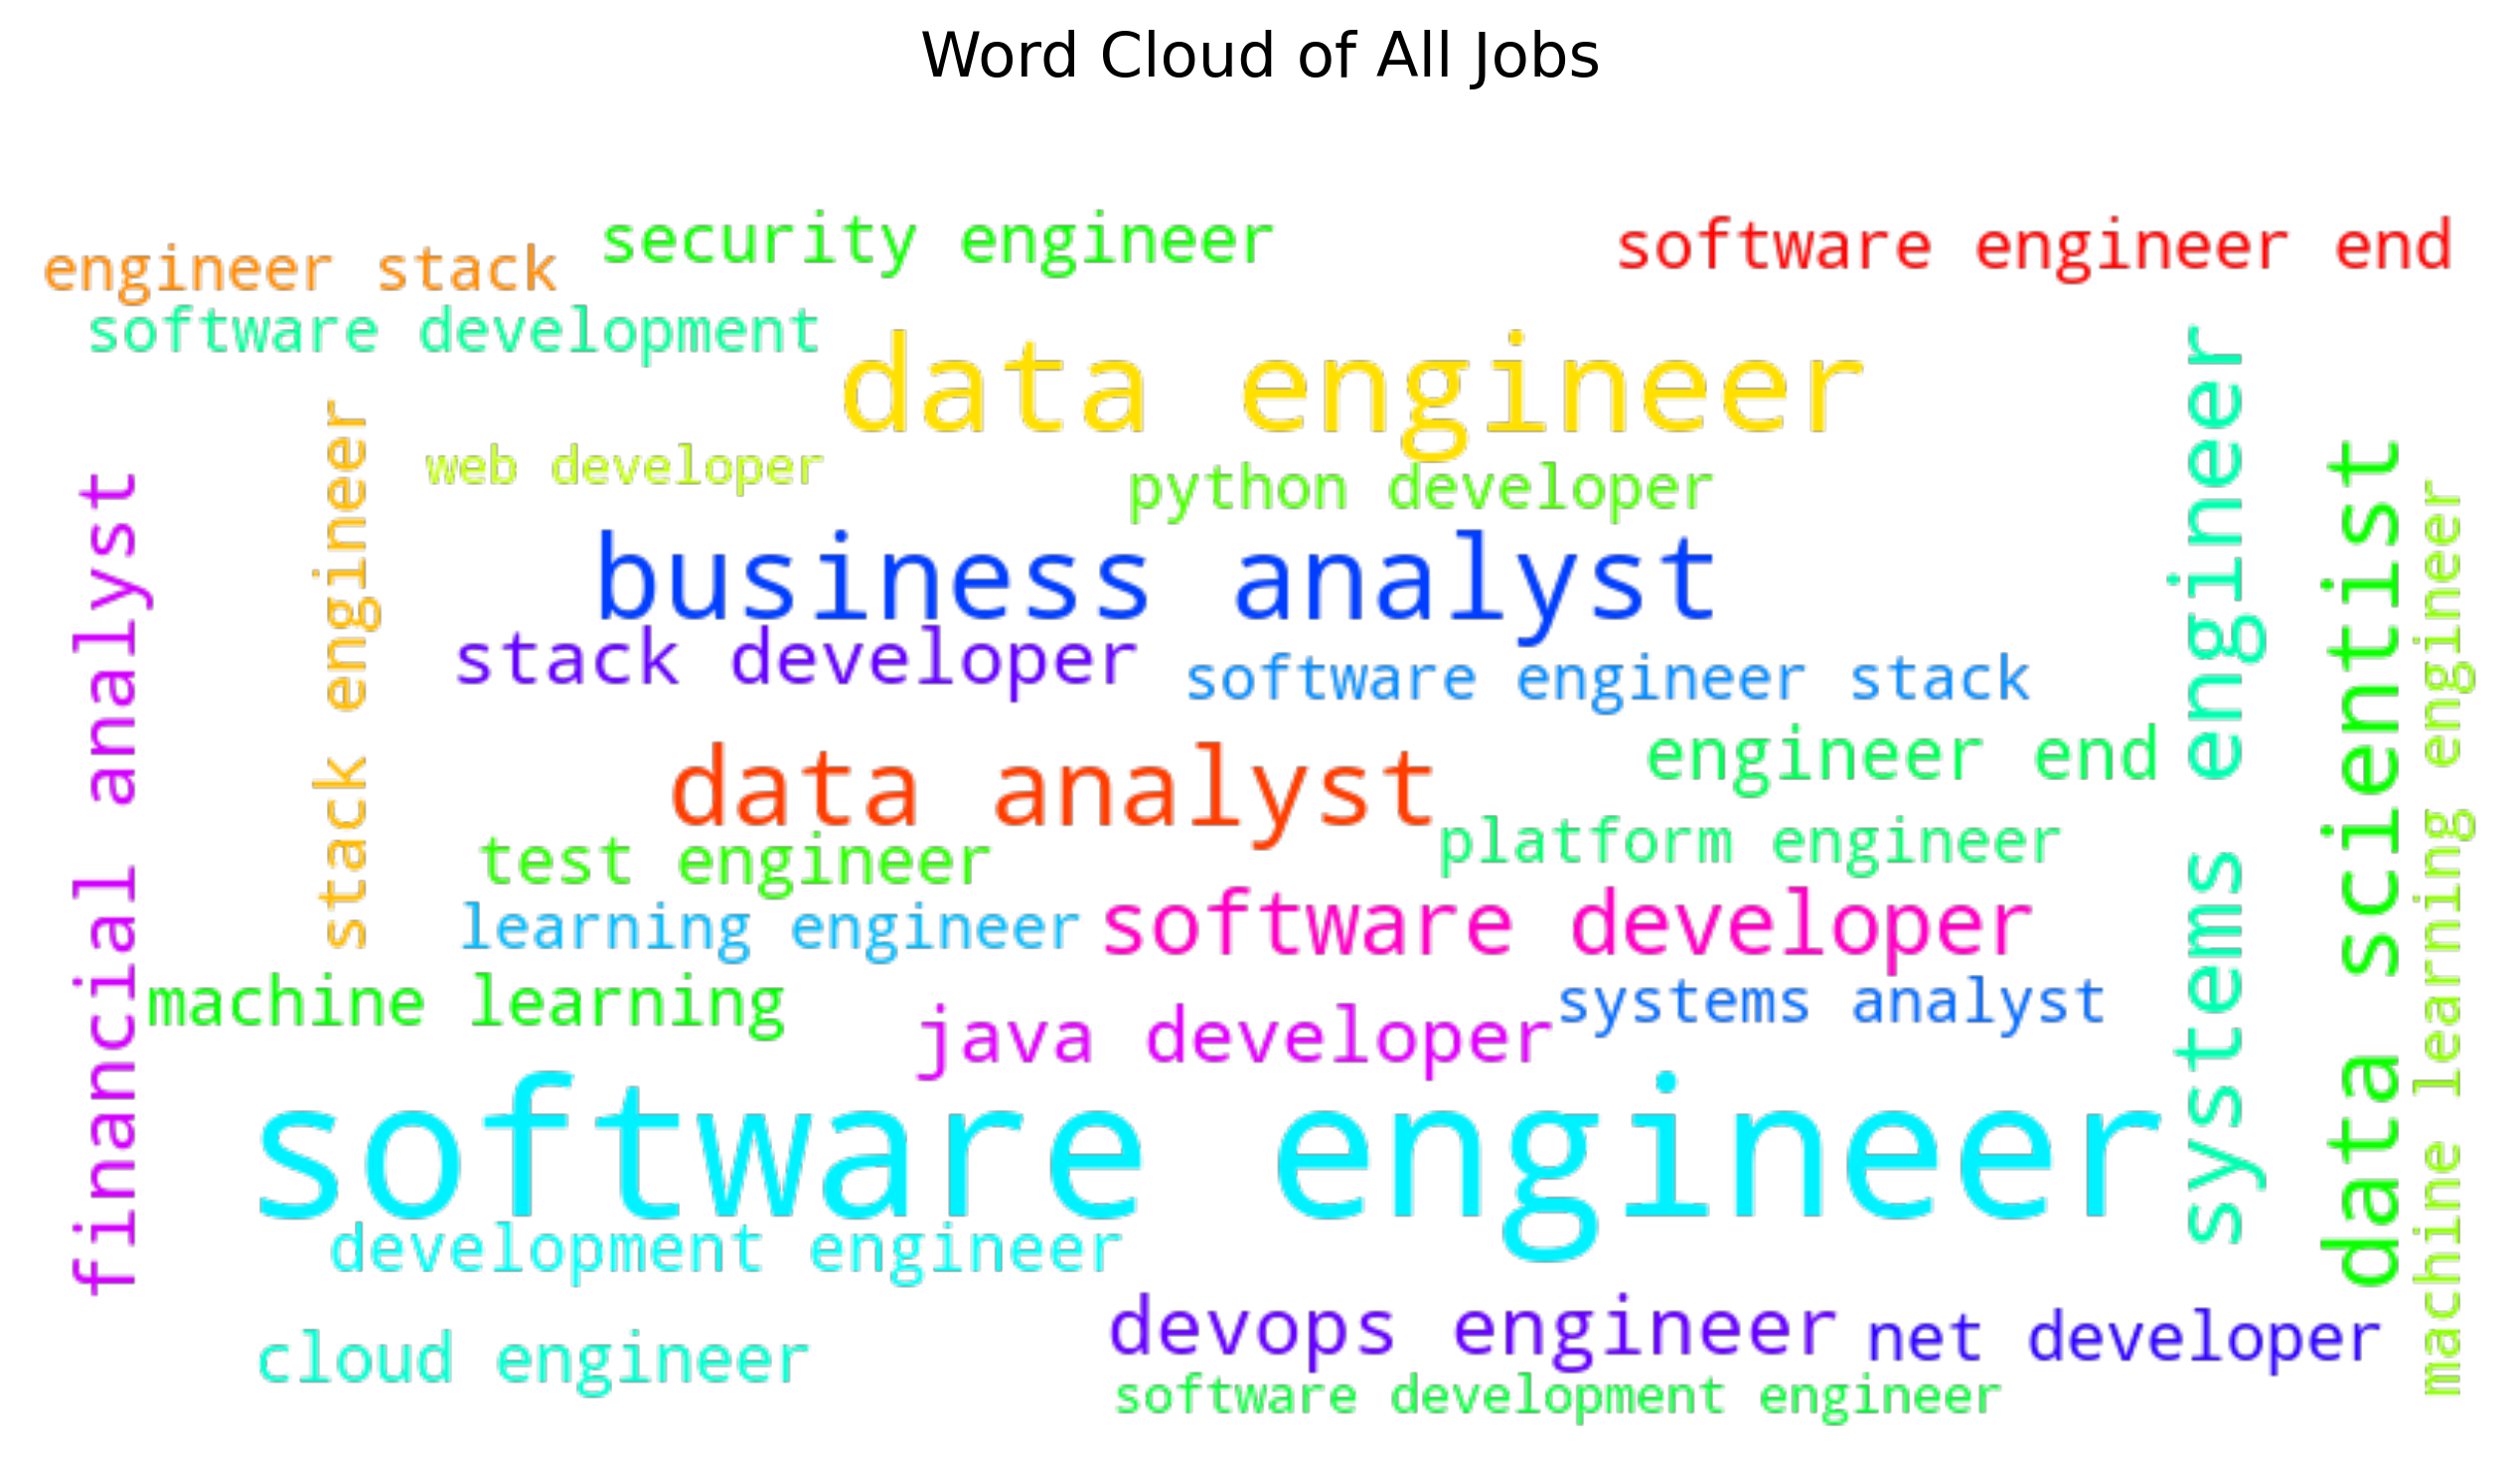

In [65]:
def plot_wordcloud(title):
    max_words = 30
    wordcloud = WordCloud(max_words=max_words, width=800, height=400, background_color=None,
                          mode='RGBA', colormap=sns.color_palette('gist_rainbow', as_cmap=True))
    wordcloud = wordcloud.generate_from_frequencies(tfidf_scores_dict)
    # Plot the word cloud
    plt.figure(figsize=(10, 5), dpi=300)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {title}', pad=30, size=15)
    plt.tight_layout()
    plt.savefig(f'images/{title.lower().replace(' ', '_')}.png', transparent=True, bbox_inches='tight')
    plt.show()


# Initialize TfidfVectorizer with n-grams and stopwords
vectorizer = TfidfVectorizer(ngram_range=(2, 3), stop_words='english')
# Fit and transform the job titles
tfidf_matrix = vectorizer.fit_transform(df_clean['Title'])
# Get the feature names (i.e., the n-grams)
feature_names = vectorizer.get_feature_names_out()

# Sum TF-IDF scores for each feature
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_scores_dict = dict(zip(feature_names, tfidf_scores))
# Replace underscores with spaces in the feature names
tfidf_scores_dict = {key.replace('__', '&'): value for key, value in tfidf_scores_dict.items()}

plot_wordcloud('All Jobs')

## 4. Clean Job Locations

In [83]:
states = {
    'Alabama': 'AL', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN',
    'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
    'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
    'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
    'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

metro_areas = {
    'Greater Phoenix Area': 'AZ',
    'Little Rock Metropolitan Area': 'AR',
    'Los Angeles Metropolitan Area': 'CA',
    'San Francisco Bay Area': 'CA',
    'San Diego Metropolitan Area': 'CA',
    'Greater Sacramento': 'CA',
    'Denver Metropolitan Area': 'CO',
    'Greater Hartford': 'CT',
    'Miami-Fort Lauderdale Area': 'FL',
    'Greater Tampa Bay Area': 'FL',
    'Gainesville Metropolitan Area': 'FL',
    'Greater Orlando': 'FL',
    'Greater Macon': 'GA',
    'Springfield, Illinois Metropolitan Area': 'IL',
    'Greater Indianapolis': 'IN',
    'Des Moines Metropolitan Area': 'IA',
    'Wichita, Kansas Metropolitan Area': 'KS',
    'Lafayette, Louisiana Metropolitan Area': 'LA',
    'Houma-Thibodaux Area': 'LA',
    'Portland, Maine Metropolitan Area': 'ME',
    'Springfield, Massachusetts Metropolitan Area': 'MA',
    'Detroit Metropolitan Area': 'MI',
    'Buffalo-Niagara Falls Area': 'NY',
    'Utica-Rome Area': 'NY',
    'Raleigh-Durham-Chapel Hill Area': 'NC',
    'Greater Bismarck Area': 'ND',
    'Greater Cleveland': 'OH',
    'Greater Enid Area': 'OK',
    'Columbia, South Carolina Metropolitan Area': 'SC',
    'Charleston, South Carolina Metropolitan Area': 'SC',
    'Nashville Metropolitan Area': 'TN',
    'Austin, Texas Metropolitan Area': 'TX',
    'Greater Houston': 'TX',
    'San Antonio, Texas Metropolitan Area': 'TX',
    'Killeen-Temple Area': 'TX',
    'San Angelo Area': 'TX',
    'Waco Area': 'TX',
    'Lubbock-Levelland Area': 'TX',
    'Salt Lake City Metropolitan Area': 'UT',
    'Appleton-Oshkosh-Neenah Area': 'WI',
    'Huntsville-Decatur-Albertville Area': 'AL',
    'Greater Birmingham, Alabama Area': 'AL',
    'Mobile Metropolitan Area': 'AL',
    'Greater Montgomery Area': 'AL',
    'Greater Tucson Area': 'AZ',
    'Jonesboro-Paragould Area': 'AR',
    'Greater Bakersfield Area': 'CA',
    'Santa Barbara-Santa Maria Area': 'CA',
    'Pueblo-Cañon City Area': 'CO',
    'Pueblo-CaÃ±on City Area': 'CO',
    'Greater Colorado Springs Area': 'CO',
    'Cape Coral Metropolitan Area': 'FL',
    'Crestview-Fort Walton Beach-Destin Area': 'FL',
    'North Port-Sarasota Area': 'FL',
    'Greater Savannah Area': 'GA',
    'Greater Idaho Falls': 'ID',
    'Urbana-Champaign Area': 'IL',
    'Lafayette, Indiana Metropolitan Area': 'IN',
    'Greater Bloomington Area': 'IN',
    'Iowa City-Cedar Rapids Area': 'IA',
    'Topeka Metropolitan Area': 'KS',
    'Greater Lexington Area': 'KY',
    'Baton Rouge Metropolitan Area': 'LA',
    'Greater Pittsfield Area': 'MA',
    'Grand Rapids Metropolitan Area': 'MI',
    'Greater Kalamazoo Area': 'MI',
    'Greater Lansing': 'MI',
    'Greater Biloxi Area': 'MS',
    'Greater Columbia, Missouri Area': 'MO',
    'Greater Reno Area': 'NV',
    'Albuquerque-Santa Fe Metropolitan Area': 'NM',
    'Rochester, New York Metropolitan Area': 'NY',
    'Albany, New York Metropolitan Area': 'NY',
    'Greater Syracuse-Auburn Area': 'NY',
    'Fayetteville, North Carolina Metropolitan Area': 'NC',
    'Greensboro--Winston-Salem--High Point Area': 'NC',
    'Greater Wilmington Area': 'NC',
    'Toledo, Ohio Metropolitan Area': 'OH',
    'Oklahoma City Metropolitan Area': 'OK',
    'Tulsa Metropolitan Area': 'OK',
    'Greater Bend Area': 'OR',
    'Erie-Meadville Area': 'PA',
    'Greater Harrisburg Area': 'PA',
    'State College-DuBois Area': 'PA',
    'Greenville-Spartanburg-Anderson, South Carolina Area': 'SC',
    'Greater Sioux Falls Area': 'SD',
    'Knoxville Metropolitan Area': 'TN',
    'Midland-Odessa Area': 'TX',
    'Greater Corpus Christi Area': 'TX',
    'College Station-Bryan Area': 'TX',
    'Brownsville Metropolitan Area': 'TX',
    'Tyler-Jacksonville Area': 'TX',
    'Greater Richmond Region': 'VA',
    'Greater Lynchburg Area': 'VA',
    'Bellingham Metropolitan Area': 'WA',
    'Greater Yakima Area': 'WA',
    'Greater Morgantown Area': 'WV',
    'Greater Madison Area': 'WI',
    'Green Bay, Wisconsin Metropolitan Area': 'WI',
    'Wausau-Stevens Point Area': 'WI',
    'Eau Claire-Menomonie Area': 'WI',
    'Greater Casper Area': 'WY',
    'Twin Falls Area': 'ID',
    'Springfield-Branson, Missouri Area': 'MO',
    'Greater Jefferson City Area': 'MO',
    'Rocky Mount-Wilson Area': 'NC',
    'Hickory-Lenoir-Morganton-Marion Area': 'NC',
    'Greater San Luis Obispo Area': 'CA',
    'Metropolitan Fresno': 'CA',
    'Greater Fort Collins Area': 'CO',
    'Greater Panama City Area': 'FL',
    'Peoria Metropolitan Area': 'IL',
    'Greater Terre Haute Area': 'IN',
    'Greater Owensboro Area': 'KY',
    'Bowling Green Metropolitan Area': 'KY',
    'Shreveport-Bossier City Area': 'LA',
    'Greater Jackson Area': 'MS',
    'Greater Billings Area': 'MT',
    'New York City Metropolitan Area': 'NY',
    'Greater Goldsboro Area': 'NC',
    'New Bern-Morehead City Area': 'NC',
    'Greater Mansfield Area': 'OH',
    'Lawton Area': 'OK',
    'Hilton Head Island, South Carolina Area': 'SC',
    'Greater Burlington Area': 'VT',
    'Blacksburg-Christiansburg-Radford Area': 'VA'
}

In [84]:
# Keep states only for patterns like 'Wyoming, United States'
df_clean['Location'] = df_clean['Location'].replace(r'(.*), United States', r'\1', regex=True)
#df_clean['Location'] = df_location.str.replace(r'(.*), United States', r'\1', regex=True)
# 'Wyoming' --> 'Wyoming, WY'
df_clean['Location'] = df_clean['Location'].apply(
    lambda loc: loc+', '+states[loc] if loc in states else loc)
# 'Lawton Area' --> 'Lawton Area, OK', 'Austin, Texas Metropolitan Area' --> 'Austin, TX'
df_clean['Location'] = df_clean['Location'].apply(
    lambda loc: loc+', '+metro_areas[loc] if loc in metro_areas else loc)
df_clean['Location'] = df_clean['Location'].replace(r'(.*),.*(, [A-Z]{2})', r'\1\2', regex=True)

# Create City and State columns
df_location = df_clean['Location'].str.extract(r'(?P<City>.*), (?P<State>[A-Z]{2})')
del df_clean['Location']
df_clean['City'], df_clean['State'] = df_location['City'], df_location['State']
cols = ['Title', 'Company', 'City', 'State', 'Posted Date', 'Worktype', 
        'Salary', 'Job Link', 'Job Description', 'Applicants', 
        'Seniority Level', 'Employment Type', 'Job Function', 'Industries']
df_clean = df_clean[cols]
df_clean

,Title,Company,City,State,Posted Date,Worktype,Salary,Job Link,Job Description,Applicants,Seniority Level,Employment Type,Job Function,Industries
0,product analyst,Aline,Alabama,AL,2024-04-28,On-site,NaN,https://www.linkedin.com/jobs/view/product-ana...,"\n At Aline, we are committed to revo...",\n Be among the first 25 applicants...,Mid-Senior level,Full-time,"Research, Analyst, and Information Technology",Software Development
1,business analyst with,ClearanceJobs,Redstone Arsenal,AL,2024-04-23,On-site,NaN,https://www.linkedin.com/jobs/view/intermediat...,\n Intermediate Business Analyst Clea...,\n Be among the first 25 applicants...,Mid-Senior level,Full-time,"Research, Analyst, and Information Technology",Defense and Space Manufacturing
2,agile business analyst with,ClearanceJobs,Redstone Arsenal,AL,2024-04-23,On-site,NaN,https://www.linkedin.com/jobs/view/agile-busin...,\n Job Number: R0195625 Agile Busines...,\n Be among the first 25 applicants...,Mid-Senior level,Part-time,"Research, Analyst, and Information Technology",Defense and Space Manufacturing
3,army aviation analyst,"eScience & Technology Solutions, Inc. (eSTS)",Fort Novosel,AL,2024-04-27,On-site,NaN,https://www.linkedin.com/jobs/view/senior-army...,"\nLocation: Fort Novosel, AL On-SiteSUMMARY:Pr...",\n Be among the first 25 applicants...,Mid-Senior level,Full-time,"Management, Engineering, and Strategy/Planning",Aviation and Aerospace Component Manufacturing...
4,cadd business analyst cleared with,ClearanceJobs,Huntsville,AL,2024-04-23,On-site,NaN,https://www.linkedin.com/jobs/view/cadd-busine...,\n As a recognized leader in real est...,\n Be among the first 25 applicants...,Mid-Senior level,Full-time,"Research, Analyst, and Information Technology",Defense and Space Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244737,software development engineer cloud hardware ...,Microsoft,Wyoming,WY,2024-05-01,Hybrid,NaN,https://www.linkedin.com/jobs/view/principal-s...,\n To delight our customers in a Clou...,\n Be among the first 25 applicants...,Not Applicable,Full-time,Engineering and Information Technology,Software Development
244738,digital technology,LTIMindtree,Rock Springs,WY,2024-05-04,Hybrid,NaN,https://www.linkedin.com/jobs/view/digital-tec...,\n You will work in one of our digita...,\n Be among the first 25 applicants...,Internship,Internship,"Design, Art/Creative, and Information Technology",IT Services and IT Consulting
244739,digital technology,LTIMindtree,Laramie,WY,2024-05-04,Hybrid,NaN,https://www.linkedin.com/jobs/view/digital-tec...,\n You will work in one of our digita...,\n Be among the first 25 applicants...,Internship,Internship,"Design, Art/Creative, and Information Technology",IT Services and IT Consulting
244740,software engineer azure hardware health service,Microsoft,Wyoming,WY,2024-05-01,Hybrid,NaN,https://www.linkedin.com/jobs/view/principal-s...,"\n Microsoft Silicon, Cloud Hardware,...",\n Be among the first 25 applicants...,Not Applicable,Full-time,Engineering and Information Technology,Software Development


## 5. Clean Job Descriptions

In [85]:
eeo_pattern = re.compile(r'(equal opportunity).*(veteran).*(protected).*(law)?(characteristic)?', flags=re.DOTALL).pattern 
url_pattern = re.compile(r'\b((?:(https?|ftp)://)?(?:www\.)?(?:[a-z0-9-]+\.)+[a-z]{2,})(/[^\s]*)?\b').pattern
email_pattern = re.compile(r'[a-z0-9_.+-]+@[a-z0-9-]+\.[a-z0-9-.]+').pattern
phone_pattern = re.compile(r'\(?\b\d{3}\)?[-.]?\d{3}[-.]?\d{4}\b').pattern
remove_pattern = re.compile(f'{eeo_pattern}|{url_pattern}|{email_pattern}|{phone_pattern}')
letter_year = re.compile(r'([a-z]+)(\d{1,2}\+)')
slash_pattern = re.compile(r'(?<=\S)/(?=\S)').pattern
number_pattern = re.compile(r'[^a-z(]\d+[^a-z)]').pattern
slash_number_pattern = re.compile(f'{slash_pattern}|{number_pattern}')


def clean_data(batch):    
    batch = batch.\
        str.lower().\
        str.replace(remove_pattern, ' ', regex=True).\
        str.replace(letter_year, r'\1 \2', regex=True).\
        str.replace(slash_number_pattern, ' ', regex=True).\
        str.replace(r'[^\w\d$+#]', ' ', regex=True).\
        str.split().\
        str.join(' ')
    return batch


tic = time.perf_counter()

# Define batch size for dividing the large series
batch_size = 4096
jd = df_clean['Job Description']
n_jd = len(df_clean['Job Description'])
jd_clean = pd.Series()  # Empty series to store the results
for i in range(0, n_jd, batch_size):
    end = i+batch_size
    batch = jd[i:end]
    batch = clean_data(batch)
    jd_clean = pd.concat([jd_clean, batch])
    print_progress(f'Clean: {end} / {n_jd}')
print_progress(f'Clean: {n_jd} / {n_jd}')
df_clean['Job Description'] = jd_clean

toc = time.perf_counter()
print(f'\nTime Use: {toc-tic} s')

Clean: 244742 / 244742
Time Use: 319.87562129995786 s


# Feature Engineering

In [87]:
python_r_pattern = re.compile(r'''
    (?P<PythonslashR>
        \br\b|caret|                                                                      # R
        python|numpy|pandas|scikit[-\s]?learn|matplotlib|seaborn|plotly|pytorch           # Python
    )''', flags=re.VERBOSE)  

sql_pattern = re.compile(r'(?P<SQL>(?<!no)sql|relational\s?database|\brds\b|bigquery|\bdb2\b)')
excel_pattern = re.compile(r'(?P<Excel>\bexcel\b(?!\sat))')
viz_pattern = re.compile(r'(?P<Viz_Tool>tableau|power[\s-]?bi|qlik)')
ml_pattern = re.compile(r'(?P<ML>machine[\s-]?learning|deep[\s-]?learning|\bai\b|\bml\b|scikit[-\s]?learn|\bnlp\b)')
nlp_pattern = re.compile(r'(?P<NLP>natural\s?language\s?process|\bnlp\b|large\s?language\s?models|\bllm\b)')
cloud_pattern = re.compile(r'''
    (?P<Cloud>
        cloud\s?computing|
        amazon\s?web\s?service|\baws\b|\bec2\b|\bs3\b|\brds\b|\bdynamodb\b|\blambda\b|\bredshift\b| # AWS
        microsoft\s?azure|azure\s?sql|                                                              # Microsofr Azure
        google\s?cloud|bigquery|                                                                    # Google Colud
        ibm\s?cloud|oracle\s?cloud|salesforce\s?cloud                                     # IBM, Oracle, Salesforce Cloud
    )''', flags=re.VERBOSE)   

bigdata_pattern = re.compile(r'(?P<Big_Data>hadoop|apache\s?spark|kafka|databrick|large\s?scale\s?data|petabyte|terabyte|big\s?data)')
microsoft_pattern = re.compile(r'''
    (?P<MS_Office>
        microsoft\s?word|power\s?point|sharepoint|powerapp|outlook|
        microsoft\s?office|ms\s?office|microsoft\s?365
    )''', flags=re.VERBOSE)

agile_pattern = re.compile(r'(?P<Agile>\bagile (?!environment)\b|\bscrum\b|kanban)')
jira_pattern = re.compile(r'(?P<JIRA>jira)')
nosql_pattern = re.compile(r'(?P<NoSQL>nosql|mongodb|cassandra|dynamodb|documentdb|bigtable|nonrelational\s?database)')
java_pattern = re.compile(r'(?P<Java>\bjava\b)')
csharp_pattern = re.compile(r'(?P<Csharp>\bc#\b)')
c_cplusplus_pattern = re.compile(r'(?P<CslashCplusplus>\bc\b|\bc++\b)')
javascript_pattern = re.compile(r'(?P<Javascript>javascript)')
scala_pattern = re.compile(r'(?P<Scala>\bscala\b)')
etl_pattern = re.compile(r'(?P<ETL>\betl\b|extract\s?transform\s?(?:and\s)?load|\bdata\b warehouse|data\s?lake)')
web_app_pattern = re.compile(r'(?P<Web_App>html|\bcss\b|\bangular\b|node\s?js|express\s?js)')
stat_pattern = re.compile(r'(?P<Statistical>\bspss\b|\bsas\b|\bstata\b)')
clearance_pattern = re.compile(r'(?P<Clearance>clearance|top\s?secret)')
hs_pattern = re.compile(r'''
    (?P<High_School>
        high\s?school\s?(?:\S+\s){0,7}(?:require|relate|degree|diploma|equivalency){1}|
        (?:require|relate|degree|diploma|equivalency){1}(?:\S+\s){0,7}high\s?school
    )''', flags=re.VERBOSE)

bs_pattern = re.compile(r'''
    (?P<Bachelorprimes>
        (?:bachelor\s?|\sbs\s)(?:\S+\s){0,7}(?:require|relate|degree|diploma|equivalency){1}|
        (?:require|relate|degree|diploma|equivalency){1}(?:\S+\s){0,7}(?:bachelor\s?|\sbs\s)
    )''', flags=re.VERBOSE)

ms_pattern = re.compile(r'''
    (?P<Masterprimes>
        (?:master\s?|\sms\s)(?:\S+\s){0,7}(?:require|relate|degree|diploma|equivalency){1}|
        (?:require|relate|degree|diploma|equivalency){1}(?:\S+\s){0,7}(?:master\s?|\sms\s)
    )''', flags=re.VERBOSE)

phd_pattern = re.compile(r'''
    (?P<PHD>
        \bphd\b(?:\S+\s){0,7}(?:require|relate|degree|diploma|equivalency){1}|
        (?:require|relate|degree|diploma|equivalency){1}(?:\S+\s){0,7}\bphd\b
    )''', flags=re.VERBOSE)

exp_pattern = re.compile(r'''
    (?P<Experience>
        (?:\S+\s?){0,3}\(?\d{1,2}\+?\)?\s?years?\s?(?:\S+\s){0,4}experience|
        experience(?:\S+\s?){0,3}\(?\d{1,2}\+?\)?\s?years?\s?(?:\S+\s){0,4}
    )''', flags=re.VERBOSE)


jd = df_clean['Job Description']
n_jd = len(jd)
batch_size = 4096
patterns = [python_r_pattern, sql_pattern, excel_pattern, viz_pattern, ml_pattern, 
            nlp_pattern, cloud_pattern, bigdata_pattern, microsoft_pattern, agile_pattern, 
            jira_pattern, nosql_pattern, java_pattern, csharp_pattern, c_cplusplus_pattern, 
            javascript_pattern, scala_pattern, etl_pattern, web_app_pattern, stat_pattern, 
            clearance_pattern, hs_pattern, bs_pattern, ms_pattern, phd_pattern, exp_pattern]


tic = time.perf_counter()
# Encode skills
for pattern in patterns[:-1]:    
    series = pd.DataFrame()
    for i in range(0, n_jd, batch_size):
        batch = jd[i:i+batch_size].str.extract(pattern).notna().astype(int)
        series = pd.concat([series, batch], ignore_index=False)
        print_progress(f'{series.columns[0]}: {i+batch_size} / {n_jd}')
    print_progress(f'{series.columns[0]}: {len(series)} / {n_jd}')
    df_clean[series.columns[0]] = series    
    print() 

# Experience (Optional)
# series = pd.DataFrame()
# for i in range(0, n_jd, batch_size):
#     batch = jd[i:i+batch_size].str.extract(exp_pattern)
#     series = pd.concat([series, batch], ignore_index=False)
#     print_progress(f'{series.columns[0]}: {i+batch_size} / {n_jd}')
# print_progress(f'{series.columns[0]}: {len(series)} / {n_jd}')
# df_clean[series.columns[0]] = series    
# print() 

toc = time.perf_counter()
print(f'\nTime Use: {toc-tic} s')

# Rename Columns
col_name = list(df_clean.columns)
new_name = []
for i, name in enumerate(col_name):
    name = name.\
        replace('_', ' ').\
        replace('slash', '/').\
        replace('sharp', '#').\
        replace('plus', '+').\
        replace('prime', "'")
    new_name.append(name)
    
df_clean.columns = new_name
# Delete rows that have none pre-defined skills
df_clean = df_clean[df_clean.loc[:, 'Python/R':'Statistical'].any(axis=1)]
df_clean.to_csv('datasets/df_clean_all_jobs.csv', index=False)
df_clean

PythonslashR: 244742 / 244742
SQL: 244742 / 244742
Excel: 244742 / 244742
Viz_Tool: 244742 / 244742
ML: 244742 / 244742
NLP: 244742 / 244742
Cloud: 244742 / 244742
Big_Data: 244742 / 244742
MS_Office: 244742 / 244742
Agile: 244742 / 244742
JIRA: 244742 / 244742
NoSQL: 244742 / 244742
Java: 244742 / 244742
Csharp: 244742 / 244742
CslashCplusplus: 244742 / 244742
Javascript: 244742 / 244742
Scala: 244742 / 244742
ETL: 244742 / 244742
Web_App: 244742 / 244742
Statistical: 244742 / 244742
Clearnace: 244742 / 244742
High_School: 244742 / 244742
Bachelorprimes: 244742 / 244742
Masterprimes: 244742 / 244742
PHD: 244742 / 244742

Time Use: 25061.1885834001 s


,Title,Company,City,State,Posted Date,Worktype,Salary,Job Link,Job Description,Applicants,...,Javascript,Scala,ETL,Web App,Statistical,Clearnace,High School,Bachelor's,Master's,PHD
0,product analyst,Aline,Alabama,AL,2024-04-28,On-site,NaN,https://www.linkedin.com/jobs/view/product-ana...,at aline we are committed to revolutionizing t...,\n Be among the first 25 applicants...,...,0,0,0,0,0,0,0,1,0,0
1,business analyst with,ClearanceJobs,Redstone Arsenal,AL,2024-04-23,On-site,NaN,https://www.linkedin.com/jobs/view/intermediat...,intermediate business analyst clearance top se...,\n Be among the first 25 applicants...,...,0,0,0,0,0,1,0,1,0,0
2,agile business analyst with,ClearanceJobs,Redstone Arsenal,AL,2024-04-23,On-site,NaN,https://www.linkedin.com/jobs/view/agile-busin...,job number r agile business analyst senior key...,\n Be among the first 25 applicants...,...,0,0,0,0,0,1,0,1,0,0
3,army aviation analyst,"eScience & Technology Solutions, Inc. (eSTS)",Fort Novosel,AL,2024-04-27,On-site,NaN,https://www.linkedin.com/jobs/view/senior-army...,location fort novosel al on sitesummary provid...,\n Be among the first 25 applicants...,...,0,0,0,0,0,1,0,0,0,0
4,cadd business analyst cleared with,ClearanceJobs,Huntsville,AL,2024-04-23,On-site,NaN,https://www.linkedin.com/jobs/view/cadd-busine...,as a recognized leader in real estate and faci...,\n Be among the first 25 applicants...,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244735,security engineer,Blackbaud,Wyoming,WY,2024-05-01,Remote,NaN,https://www.linkedin.com/jobs/view/senior-secu...,blackbaud unleashes the potential of the peopl...,\n Be among the first 25 applicants...,...,0,0,0,0,0,0,0,0,0,0
244736,solution engineer west,Salesforce,Wyoming,WY,2024-04-27,Hybrid,NaN,https://www.linkedin.com/jobs/view/solution-en...,to get the best candidate experience please co...,\n Be among the first 25 applicants...,...,0,0,0,1,0,0,0,0,0,0
244737,software development engineer cloud hardware ...,Microsoft,Wyoming,WY,2024-05-01,Hybrid,NaN,https://www.linkedin.com/jobs/view/principal-s...,to delight our customers in a cloud first worl...,\n Be among the first 25 applicants...,...,1,0,0,1,0,0,0,1,1,0
244740,software engineer azure hardware health service,Microsoft,Wyoming,WY,2024-05-01,Hybrid,NaN,https://www.linkedin.com/jobs/view/principal-s...,microsoft silicon cloud hardware and infrastru...,\n Be among the first 25 applicants...,...,1,0,0,0,0,0,0,1,1,0


# Select and Normalize Interested Roles

In [88]:
def clean_title(row, pattern):
    if re.search(pattern, row['Title']) and not row['selected']:
        title = pattern.replace('\\b', '').replace('.*', ' ').title()
        if title == 'Machine Learning':
            title = 'ML Engineer'
        row['Title'] = title
        row['selected'] = True
    return row  
    

df_clean['selected'] = False
# Patterns of interested roles
patterns = [r'machine.*learning', r'\bdata\b.*engineer', r'\bdata\b.*scientist', r'\bdata\b.*analyst']
for pattern in patterns:
    df_clean = df_clean.apply(func=clean_title, axis=1, pattern=pattern)
# Keep interested roles only
df_clean = df_clean[df_clean['selected'] == 1]
del df_clean['selected']

df_clean.to_csv('datasets/df_clean.csv', index=False)
df_clean

C:\Users\yongh\AppData\Local\Temp\ipykernel_17656\794356945.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['selected'] = False


,Title,Company,City,State,Posted Date,Worktype,Salary,Job Link,Job Description,Applicants,...,Javascript,Scala,ETL,Web App,Statistical,Clearnace,High School,Bachelor's,Master's,PHD
137,Data Analyst,Amazon,Tempe,AZ,2024-04-12,On-site,NaN,https://www.linkedin.com/jobs/view/senior-comp...,descriptionare you interested in working on a ...,\n 60 applicants\n,...,0,0,0,0,1,0,0,1,0,0
755,Data Analyst,Dice,Fresno,CA,2024-04-28,On-site,NaN,https://www.linkedin.com/jobs/view/data-report...,dice is the leading career destination for tec...,\n Be among the first 25 applicants...,...,0,0,0,0,0,0,0,0,0,0
866,Data Analyst,Team Remotely Inc,Los Angeles,CA,2024-04-28,Remote,NaN,https://www.linkedin.com/jobs/view/data-bi-ana...,this is a remote position data bi analyst 1 ye...,\n 40 applicants\n,...,0,0,0,0,0,0,0,1,0,0
1063,ML Engineer,myGwork - LGBTQ+ Business Community,San Jose,CA,2024-04-15,On-site,NaN,https://www.linkedin.com/jobs/view/risk-analys...,this inclusive employer is a member of mygwork...,\n Be among the first 25 applicants...,...,0,0,0,0,0,0,0,1,0,0
1803,Data Analyst,Helen of Troy,Cortez,CO,2024-04-17,Hybrid,NaN,https://www.linkedin.com/jobs/view/master-data...,join our team at helen of troy as our master d...,\n Be among the first 25 applicants...,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244688,Data Scientist,Microsoft,Wyoming,WY,2024-05-01,Remote,NaN,https://www.linkedin.com/jobs/view/sr-data-sci...,do you enjoy solving problems looking at probl...,\n Be among the first 25 applicants...,...,0,0,0,0,0,0,0,1,1,0
244689,Data Scientist,Microsoft,Wyoming,WY,2024-05-01,Remote,NaN,https://www.linkedin.com/jobs/view/senior-data...,do you enjoy solving problems looking at probl...,\n Be among the first 25 applicants...,...,0,0,0,0,0,1,0,1,1,0
244690,Data Scientist,Microsoft,Wyoming,WY,2024-05-01,Remote,NaN,https://www.linkedin.com/jobs/view/principal-d...,do you enjoy solving problems looking at probl...,\n Be among the first 25 applicants...,...,0,0,0,0,0,0,0,1,1,0
244691,Data Scientist,Microsoft,Wyoming,WY,2024-05-03,Remote,NaN,https://www.linkedin.com/jobs/view/principal-d...,do you enjoy solving problems looking at probl...,\n Be among the first 25 applicants...,...,0,0,0,0,0,0,0,1,1,0


## Data for Tableau

In [101]:
df_clean = pd.read_csv('datasets/df_clean.csv')

In [102]:
df_tableau = df_clean[['Title', 'City', 'State', 'Worktype', 'Seniority Level', 'Employment Type', 
                       'Clearance', 'High School', "Bachelor's", "Master's", 'PHD']]
df_tableau.to_csv('datasets/df_tableau.csv', index=False)